In [28]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


### Data Collection 


In [29]:
df_train = pd.read_csv('train_datas.csv')   ### training dataset 


In [30]:
df_train

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,Neutral
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,Positive
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive
...,...,...,...,...,...,...,...,...
3995,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2017-12-08T00:00:00.000Z,"It‚Äôs fun for the family to play with, but it...",Fun toy,Positive
3996,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,2017-03-31T00:00:00.000Z,"I love the Kindle, it is a great product. It r...",Great Product,Positive
3997,Amazon Tap - Alexa-Enabled Portable Bluetooth ...,Amazon,"Amazon Echo,Home Theater & Audio,MP3 MP4 Playe...",Electronics,2017-01-19T00:00:00.000Z,I was looking for a blutooth speaker to use wi...,"Great ""dumb"" speaker",Positive
3998,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2016-05-27T00:00:00.000Z,This is the second Amazon Fire 7 tablet I have...,A great 7 inch tablet at a great price,Positive


In [31]:
df_train.duplicated().sum()

58

In [32]:
df_train = df_train.drop_duplicates().reset_index(drop=True)  ### removing duplocates we've 58 in the training dataset 

Positive    194
Neutral     158
Negative     90
Name: sentiment, dtype: int64

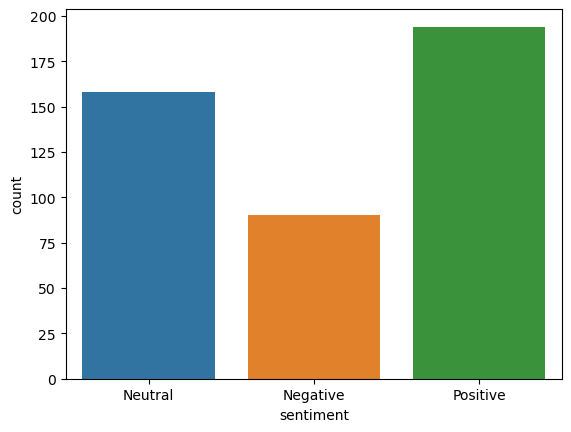

In [36]:
sns.countplot( x= df_train['sentiment'])
df_train['sentiment'].value_counts()

In [34]:
rows_to_remove = df_train[df_train['sentiment'].str.contains('Positive')].head(3500)    

# Drop the selected rows from the DataFrame  to resolve class imbalance 
df_train = df_train.drop(rows_to_remove.index)  

In [35]:
df_train.shape

(442, 8)

<h3>Data Preprocessing</h3>

In [37]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to C:\Users\WN-081
[nltk_data]     u\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\WN-081
[nltk_data]     u\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score


In [40]:
df_train.columns

Index(['name', 'brand', 'categories', 'primaryCategories', 'reviews.date',
       'reviews.text', 'reviews.title', 'sentiment'],
      dtype='object')

In [41]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


def preprocess_text(text):
    try:
        text = text.lower()  # Convert to lowercase
        text = re.sub(r'\W+', ' ', text)  # Remove special characters
        words = word_tokenize(text)  # Tokenize text
        words = [word for word in words if word not in stopwords.words('english')]  # Remove stopwords
        return ' '.join(words)
    except:
        return 1
df_train['preprocessed_text'] = df_train['reviews.text'].apply(preprocess_text)


In [42]:
df_train['preprocessed_text']

2       average alexa option show things screen still ...
6       7 year old daughter saved brother bought 8gb y...
9                   cheap run chrome stuff returned store
17                      good old kindle seams work better
59      nothing spectacular item also nothing majorly ...
                              ...                        
3937    äôs fun family play may get boring newness wea...
3938    love kindle great product reduces eye strain e...
3939    looking blutooth speaker use phone want worry ...
3940    second amazon fire 7 tablet purchased time col...
3941                      satisfied tablet fast efficient
Name: preprocessed_text, Length: 442, dtype: object

In [47]:
X_train, X_test, y_train, y_test = train_test_split(df_train['preprocessed_text'], df_train['sentiment'], test_size=0.2, random_state=52)

In [48]:
from sklearn.model_selection import  cross_val_score


In [49]:
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


<h3>Naive Bayes</h3>

In [50]:
model = MultinomialNB()
model.fit(X_train_vec, y_train)


MultinomialNB()

In [51]:
num_folds = 4  # Change this value as needed
scores = cross_val_score(model, X_train_vec, y_train, cv=num_folds, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validation scores: [0.61797753 0.60227273 0.59090909 0.55681818]
Mean accuracy: 0.5919943820224719


In [54]:
y_pred = model.predict(X_test_vec)
print("Naive Bayes \n\n")
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate confusion metrix
print("\n\nConfusion matrix :\n",confusion_matrix(y_test,y_pred),'\n\n')


# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Naive Bayes 


Accuracy: 0.6179775280898876


Confusion matrix :
 [[ 7  8  5]
 [ 1 21 10]
 [ 0 10 27]] 


Classification Report:
               precision    recall  f1-score   support

    Negative       0.88      0.35      0.50        20
     Neutral       0.54      0.66      0.59        32
    Positive       0.64      0.73      0.68        37

    accuracy                           0.62        89
   macro avg       0.69      0.58      0.59        89
weighted avg       0.66      0.62      0.61        89



<h3>Decision Tree Classifier</h3>

In [55]:
from sklearn.tree import DecisionTreeClassifier


In [57]:
d_tree = DecisionTreeClassifier()
d_tree.fit(X_train_vec, y_train)

y_pred = d_tree.predict(X_test_vec)

print("Decision Tree Classifier \n\n")
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate confusion metrix
print("\n\nConfusion matrix :\n",confusion_matrix(y_test,y_pred),'\n\n')


# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Decision Tree Classifier 


Accuracy: 0.5056179775280899


Confusion matrix :
 [[10  7  3]
 [ 5 16 11]
 [ 4 14 19]] 


Classification Report:
               precision    recall  f1-score   support

    Negative       0.53      0.50      0.51        20
     Neutral       0.43      0.50      0.46        32
    Positive       0.58      0.51      0.54        37

    accuracy                           0.51        89
   macro avg       0.51      0.50      0.51        89
weighted avg       0.51      0.51      0.51        89



<h3> SVC</h3>

In [58]:
from sklearn.svm import SVC

In [60]:

svc = SVC(kernel='linear')
svc.fit(X_train_vec, y_train)

y_pred = svc.predict(X_test_vec)
print("SVC\n\n")

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


print("\n\nConfusion matrix :\n",confusion_matrix(y_test,y_pred),'\n\n')



report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

SVC


Accuracy: 0.6404494382022472


Confusion matrix :
 [[10  6  4]
 [ 5 18  9]
 [ 2  6 29]] 


Classification Report:
               precision    recall  f1-score   support

    Negative       0.59      0.50      0.54        20
     Neutral       0.60      0.56      0.58        32
    Positive       0.69      0.78      0.73        37

    accuracy                           0.64        89
   macro avg       0.63      0.62      0.62        89
weighted avg       0.63      0.64      0.64        89



In [310]:
# Preprocess the input text
input_text = """
not too old"""
preprocessed_input = preprocess_text(input_text)

# Vectorize the preprocessed input
input_vec = vectorizer.transform([preprocessed_input])

# Predict the sentiment
predicted_sentiment = svc.predict(input_vec)[0]

print("Predicted Sentiment:", predicted_sentiment)


Predicted Sentiment: Neutral


In [297]:
import pickle
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

df_train = pd.read_csv('train_datas.csv')   ### training dataset 
df_train = df_train.drop_duplicates().reset_index(drop=True)  ### removing duplocates we've 58 in the training dataset 
rows_to_remove = df_train[df_train['sentiment'].str.contains('Positive')].head(3500)    

# Drop the selected rows from the DataFrame  to resolve class imbalance 
df_train = df_train.drop(rows_to_remove.index)  
def preprocess_text(text):
    try:
        text = text.lower()  # Convert to lowercase
        text = re.sub(r'\W+', ' ', text)  # Remove special characters
        words = word_tokenize(text)  # Tokenize text
        words = [word for word in words if word not in stopwords.words('english')]  # Remove stopwords
        return ' '.join(words)
    except:
        return 1
df_train['preprocessed_text'] = df_train['reviews.text'].apply(preprocess_text)

X_train, X_test, y_train, y_test = train_test_split(df_train['preprocessed_text'], df_train['sentiment'], test_size=0.2, random_state=52)

vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

svc = SVC(kernel='linear')
svc.fit(X_train_vec, y_train)

y_pred = svc.predict(X_test_vec)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\n\nConfusion matrix :\n",confusion_matrix(y_test,y_pred),'\n\n')

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Accuracy: 0.6404494382022472


Confusion matrix :
 [[10  6  4]
 [ 5 18  9]
 [ 2  6 29]] 


Classification Report:
               precision    recall  f1-score   support

    Negative       0.59      0.50      0.54        20
     Neutral       0.60      0.56      0.58        32
    Positive       0.69      0.78      0.73        37

    accuracy                           0.64        89
   macro avg       0.63      0.62      0.62        89
weighted avg       0.63      0.64      0.64        89



In [298]:
import pickle
